QUESTION 1


(a) Rotations, translations and scaling are all rigid transformations which are affine transformations, meaning these transformations preserve points, straight lines and parallelism

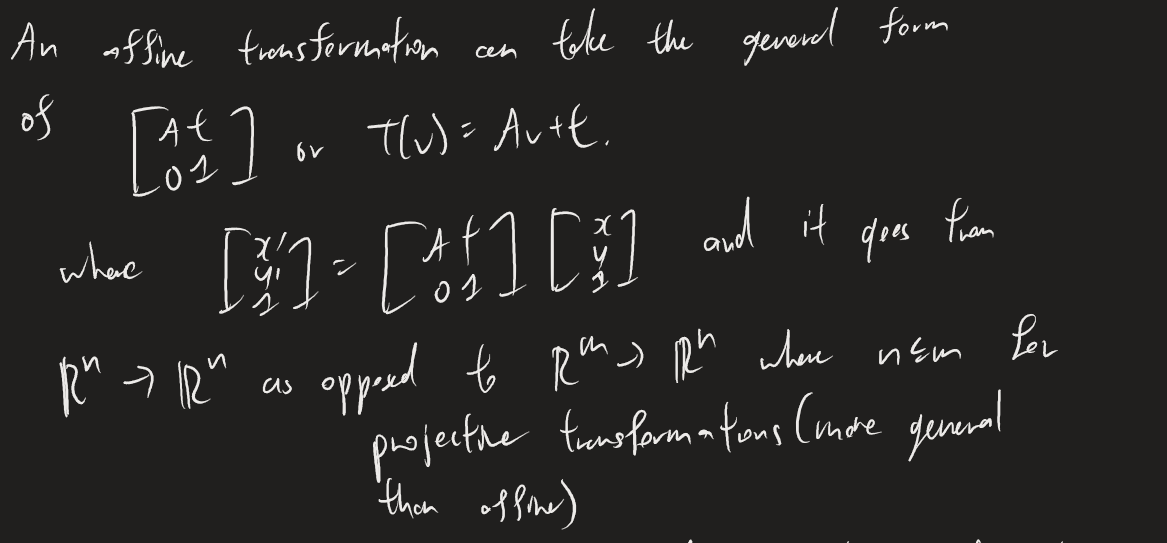
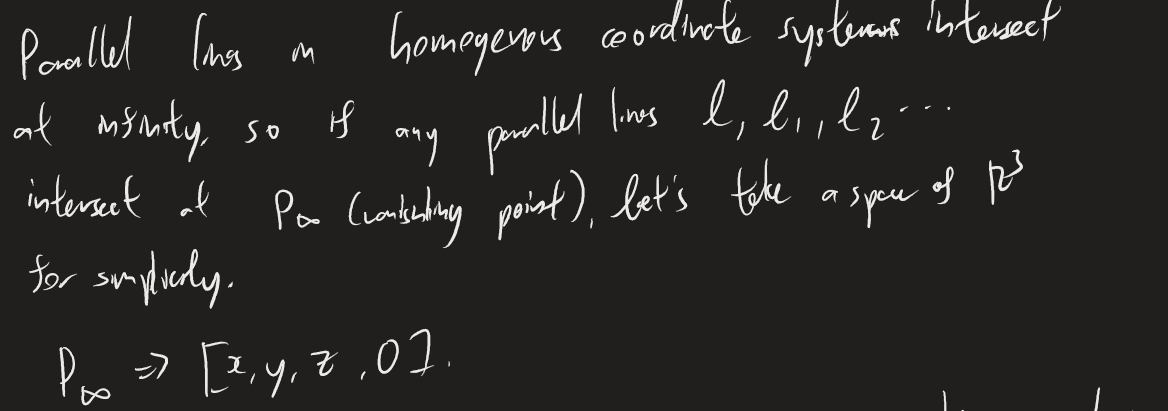
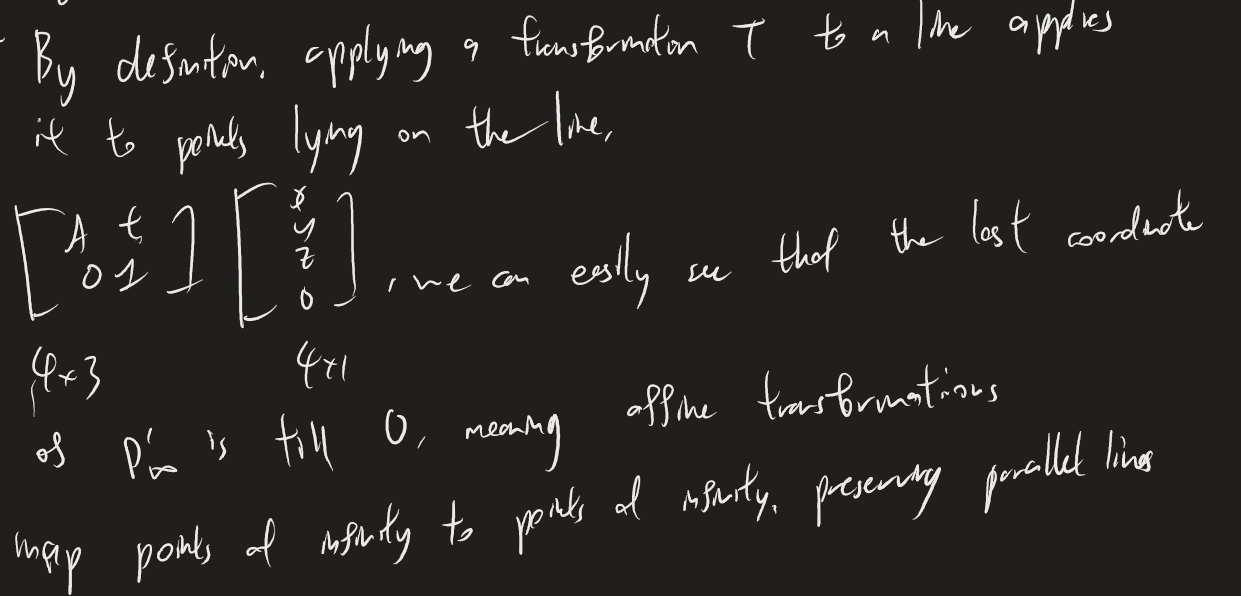

(b) Rotations and translations are isometric transformations so they preserve distances and angles so unit area would be the same

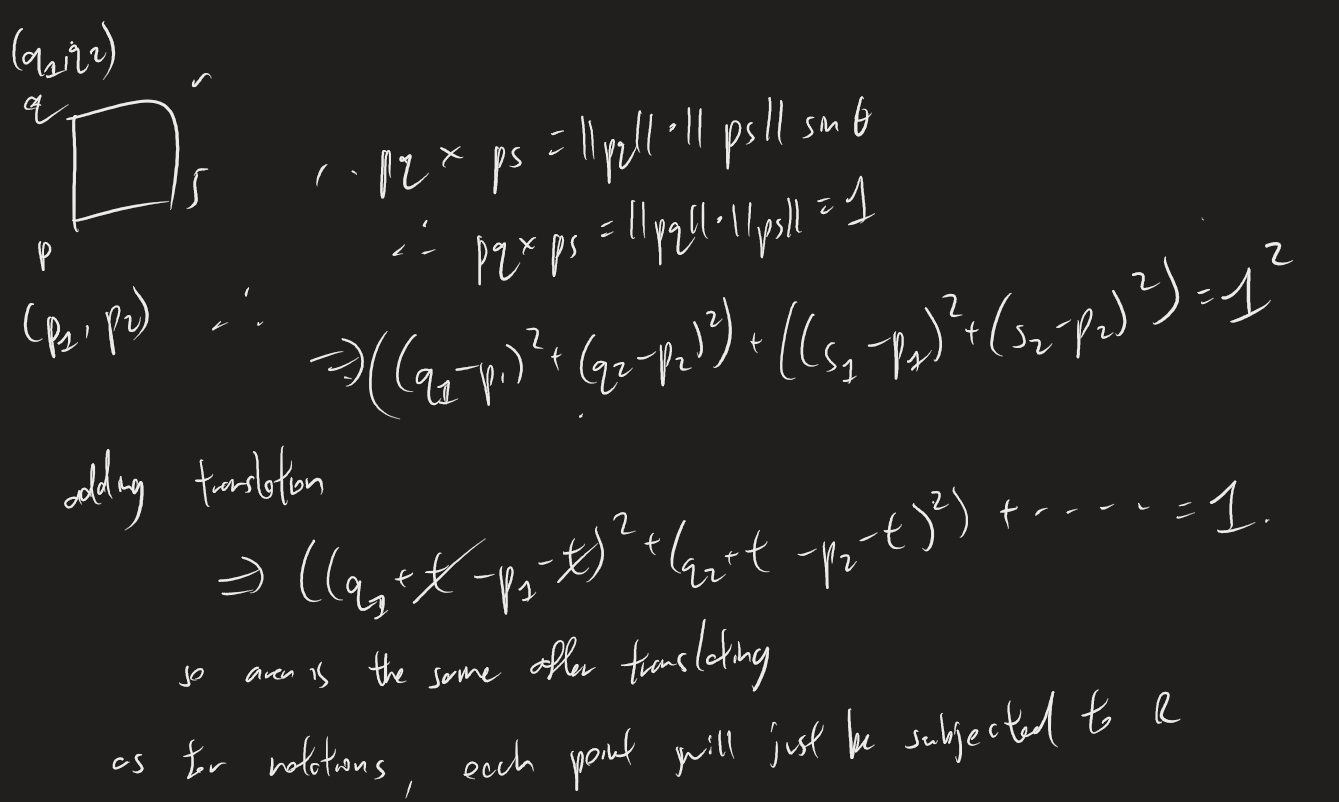
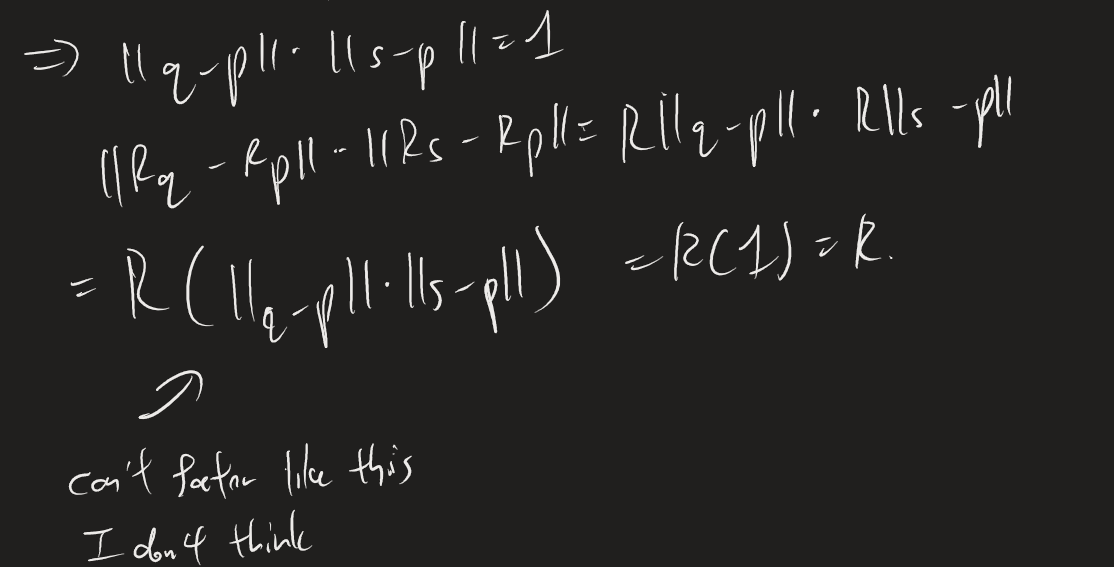

(c) NO FUCKING CLUE

(d) Projective transformations might map a point at infinity to a point not at infinity, so it does not preserve parallelism (as two parallel lines meeting at infinity after being projectively might not meet at infinity anymore, hence no longer parallel)

In [202]:
import numpy as np

In [203]:
def compute_camera_matrix(real_XY, front_image, back_image):
    # TODO: Fill in this code
    # Hint: reshape your values such that you have PM=p,
    # and use np.linalg.lstsq or np.linalg.pinv to solve for M.
    # See https://apimirror.com/numpy~1.11/generated/numpy.linalg.pinv
    #
    # Our solution has shapes for M=(8,), P=(48,8), and p=(48,)
    # Alternatively, you can set things up such that M=(4,2), P=(24,4), and p=(24,2)
    # Lastly, reshape and add the (0,0,0,1) row to M to have it be (3,4)

    # BEGIN YOUR CODE HERE
    pass
    # END YOUR CODE HERE

In [204]:
real_XY = np.load('real_XY.npy')
front_image = np.load('front_image.npy')
back_image = np.load('back_image.npy')

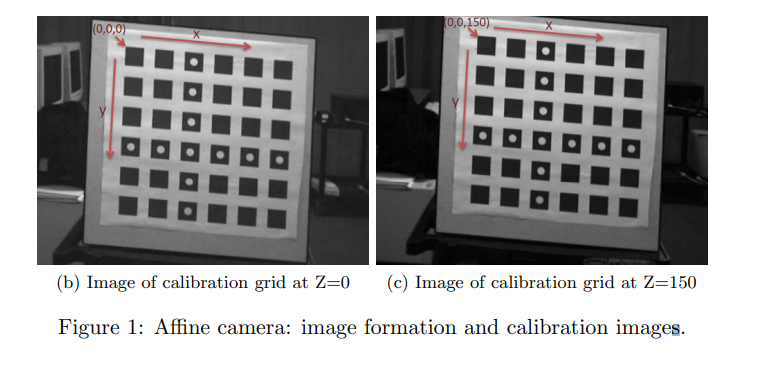 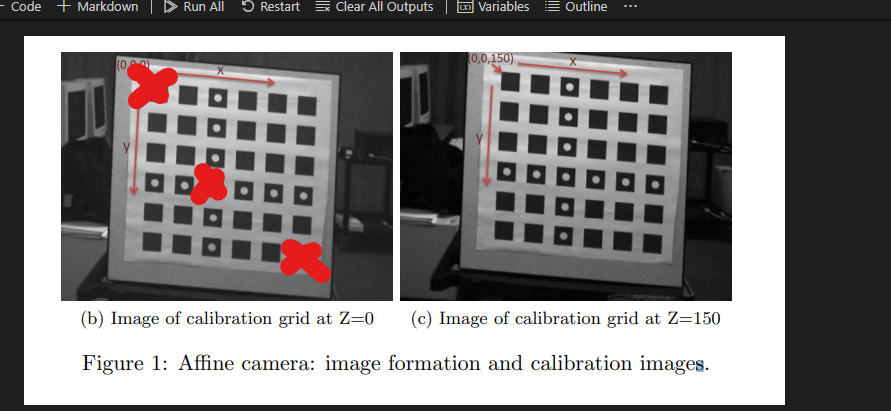

In [205]:
import numpy as np
from utils import mat2euler
import math

In [206]:
#the real world co-ordinates are given in real_XY, so converting them depending on their Z axis we have our original P, now the co-ordinates given in front and back image
#(in floats) represent 2d co-ordinates UV, so we essentially have MP(front) = p(front) and MP(back) = p(back)

real_front_3d = np.concatenate((real_XY, np.zeros((12, 1))), axis = 1)
real_front_3d = np.reshape(real_front_3d, (12, 3))



real_back_3d = np.concatenate((real_XY, np.ones((12, 1))), axis = 1)
for i in range(len(real_back_3d)):
    real_back_3d[i, 2] *= 150

real_back_3d = np.reshape(real_back_3d, (12, 3))

#correspondences are between front, back and real grids 

In [207]:
#converting co-ordinates to homogenous systems 
#co-ordinats are already sorted in order for corresponding points

real_front_3d = np.concatenate((real_front_3d, np.ones((12, 1))), axis = 1)
real_back_3d = np.concatenate((real_back_3d, np.ones((12, 1))), axis = 1)
front_image = np.concatenate((front_image, np.ones((12,1))), axis=1)
back_image = np.concatenate((back_image, np.ones((12,1))), axis=1)

In [208]:
print(real_front_3d.shape)
print(real_back_3d.shape)
print(front_image.shape)
print(back_image.shape)

(12, 4)
(12, 4)
(12, 3)
(12, 3)


In [209]:
#putting both front and back as a total system of linear equations
total_real_3d = np.concatenate((real_front_3d, real_back_3d), axis=0)
total_image = np.concatenate((front_image, back_image), axis=0)


In [210]:
M, res, rank, s = np.linalg.lstsq(total_real_3d, total_image)
final_M = np.transpose(M)
print(final_M.shape)
print(final_M)

(3, 4)
[[ 5.31276507e-01 -1.80886074e-02  1.20509667e-01  1.29720641e+02]
 [ 4.84975447e-02  5.36366401e-01 -1.02675222e-01  4.43879607e+01]
 [-2.58318699e-18  5.20417043e-18  4.17417836e-18  1.00000000e+00]]


C:\Users\pavan\AppData\Local\Temp\ipykernel_12016\2942782199.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  M, res, rank, s = np.linalg.lstsq(total_real_3d, total_image)


In [211]:
print(total_image.shape)
print(total_real_3d.shape)

(24, 3)
(24, 4)


In [212]:
calculated_corner_locations_from_M = np.matmul(final_M, np.transpose(total_real_3d))
calculated_corner_locations_from_M = np.transpose(calculated_corner_locations_from_M)
print(calculated_corner_locations_from_M - total_image)

[[-4.86359222e-01  9.17607415e-02  0.00000000e+00]
 [-6.26338729e-02  2.23637976e-01 -1.11022302e-16]
 [ 4.08735759e-01  9.01858039e-01  2.22044605e-16]
 [-4.73589590e-01 -1.47219196e-01  2.22044605e-16]
 [-7.81838729e-02 -1.45889581e+00  8.88178420e-16]
 [ 8.04141476e-01 -8.68418572e-01  6.66133815e-16]
 [ 3.58311108e-01  2.68401490e-01  8.88178420e-16]
 [ 3.93185759e-01  5.95124255e-01  1.11022302e-15]
 [-6.63399376e-01 -1.22376088e+00  1.11022302e-15]
 [ 1.13602597e+00 -6.33283645e-01  8.88178420e-16]
 [-2.27004396e-01  1.42063642e+00  1.11022302e-15]
 [-1.10922974e+00  8.30159182e-01  1.33226763e-15]
 [-7.53909222e-01 -6.34322592e-01  6.66133815e-16]
 [ 1.28416127e-01 -4.38453569e-02  4.44089210e-16]
 [ 1.41185759e-01  1.09297471e+00  6.66133815e-16]
 [-2.82539590e-01  5.02497471e-01  8.88178420e-16]
 [-3.45633873e-01 -1.26777914e+00  1.55431223e-15]
 [ 1.45379148e+00 -2.18701906e-01  1.33226763e-15]
 [ 5.49361108e-01  4.59418157e-01  1.55431223e-15]
 [ 1.25735759e-01 -1.31059078e-

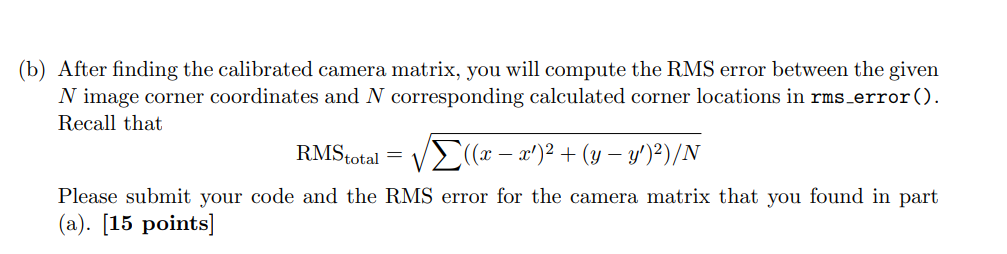

In [213]:
#N is 24

def RMS_total(matrix_one, matrix_two):
    error = 0
    for i in range(len(matrix_one)):
        error += ((matrix_one[i, 0] - matrix_two[i, 0]) ** 2) + ((matrix_one[i, 1] - matrix_two[i, 1]) ** 2)    
    error = error / 24
    error = np.sqrt(error)
    return error

print(RMS_total(calculated_corner_locations_from_M, total_image))

0.9938304832798428


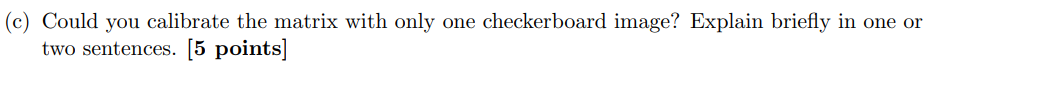

With only one checkerboard image, we would have 12 corner observations still, meaning 24 total equations (as opposed to the 48 with two checkerboards). So there are in total 24 constraints to solve 8 unknowns, which is possible. Hence, the matrix can be calibrated. (even in the case of 11 unknowns, if we have 2n > 11, it is overdetermined, meaning we only need at least 6 correspondences and we have 12 in this case)

In [214]:
#i can find the intersection but the cross product of both lines i get DOES not end up with the for [x y 0] so how can they be considered to cross at "infinity"
#the reason for that is because projective transformation from 3d world to 2d image will map points at infinity to points no longer at infinity in the 2d image plane
#hence the 1 coordinate in my calculations before, by definition, vanishing points ARE these points at infinity which are mapped to points no longer at infinity at image plane 

In [247]:
def compute_vanishing_point(list):
    x_1 = list[0][0]
    y_1 = list[0][1] #point 1
    x_2 = list[1][0]
    y_2 = list[1][1] #point 2
    x_3 = list[2][0]
    y_3 = list[2][1] #point 3
    x_4 = list[3][0]
    y_4 = list[3][1] # point 4

    m_1 = (y_2 - y_1) / (x_2 - x_1)
    m_2 = (y_4 - y_3) / (x_4 - x_3)

    c_1 = (-m_1 * (x_1) + y_1)
    c_2 = (-m_2 * (x_3) + y_3)

    x = (c_2 - c_1) / (m_1 - m_2)
    y = m_1 * ((c_2 - c_1) / (m_1 - m_2)) + c_1

    #vanishing point is (x,y) in 2d image plane
    vanishing_point = np.array([x, y])

    return(vanishing_point)


In [248]:
print(compute_vanishing_point([[1474, 494], [714, 614], [1438, 1094], [750, 1378]]))

[3769.60144058  131.53661465]


In [250]:
vanishing_point_list = []

vanishing_point_list.append(compute_vanishing_point([[1840, 478], [1080, 598], [1774, 1086], [1094, 1340]]))  
vanishing_point_list.append(compute_vanishing_point([[1080, 598], [424, 356], [1094, 1340], [372, 812]]))  
vanishing_point_list.append(compute_vanishing_point([[674, 1826], [2456, 1060], [1774, 1086], [1094, 1340]]))  

print(vanishing_point_list) #have our three vanishing points needed to compute K as we have the assumption that camera is zero skew and distortion

[array([4545.25628141,   50.85427136]), array([-939.21297569, -146.89259164]), array([6517.22217664, -685.73298951])]


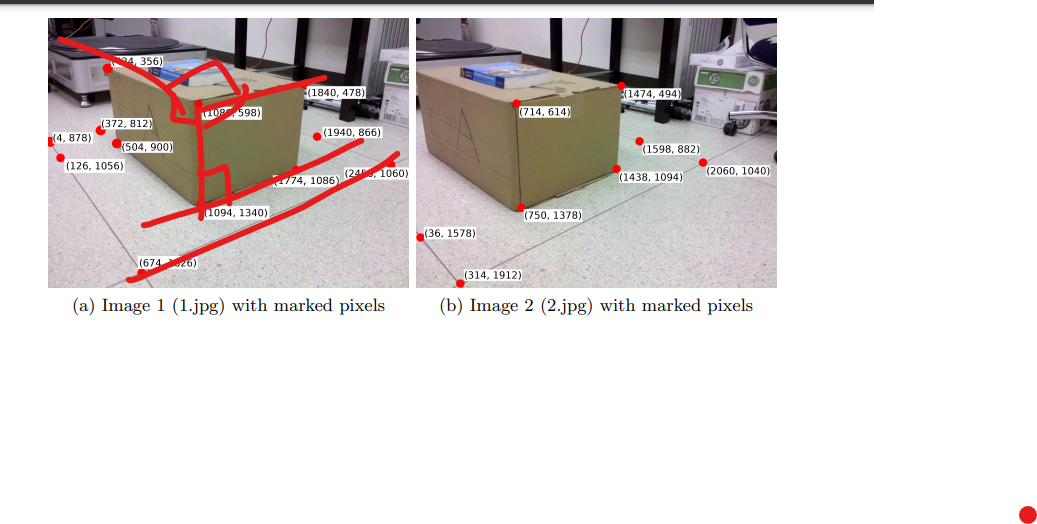
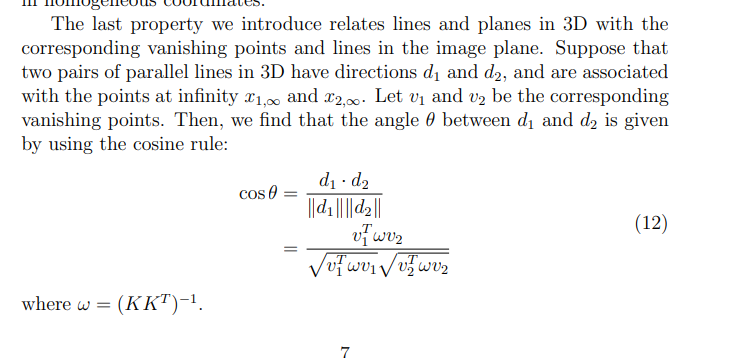

The three sets of parallel lines are orthogonal to each other (need to ask qilin how the third set is orthogonal as I really dont see it geometrically) so we have three constraints via definition of cosine rule. I suppose I'll have to double check the idea that if a line L and L2 lies on P and P2 planes respectively, if P and P2 are orthogonal, is it guaranteed that L and L2 are also orthogonal.
